<h1> Loading Development Dataset </h1>

In [ ]:
#audio_dataset_path='F:\myPolito\DSL\Final Project'
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/DSL_Final_Project/development.csv'
metadata = pd.read_csv(file_path)
metadata.head()

Mounted at /content/drive


,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40


<h1> Loading audio using librosa library </h1>

In [ ]:
import librosa
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
audio_lengthes =[]
audios = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join('/content/drive/My Drive/DSL_Final_Project',str(row["path"]))

    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best')
    audios.append(audio)
    labels = row["action"]  + row["object"]
    audio_lengthes.append([len(audio), labels])

245it [03:32,  1.15it/s]


KeyboardInterrupt: ignored

<h1> Preprocess </h1>

In [ ]:
audio_lengthes_df = pd.DataFrame(audio_lengthes)
header = ["length","class"]
audio_lengthes_df.columns = header

In [ ]:
audio_lengthes_df

,length,class
0,40961,change languagenone
1,30720,activatemusic
2,43009,deactivatelights
3,38912,increasevolume
4,53248,increasevolume
...,...,...
9849,60212,decreasevolume
9850,58330,deactivatelights
9851,58330,deactivatelights
9852,50804,deactivatelights


In [ ]:
grouped_df = audio_lengthes_df.groupby("class")

In [ ]:
import matplotlib.pyplot as plt

Content = []
Class = []
for length, classs in grouped_df:
    print(classs)
    print(length)
    Class.append(classs)
    Content.append(length)

      length          class
1      30720  activatemusic
12     32768  activatemusic
13     28672  activatemusic
14     30720  activatemusic
63     38912  activatemusic
...      ...            ...
9818   36864  activatemusic
9834   40961  activatemusic
9835   36864  activatemusic
9836   38912  activatemusic
9848   58330  activatemusic

[791 rows x 2 columns]
activatemusic
      length                class
0      40961  change languagenone
47     32768  change languagenone
48     49153  change languagenone
49     55296  change languagenone
50     36864  change languagenone
...      ...                  ...
9815   40961  change languagenone
9816   38912  change languagenone
9817   30720  change languagenone
9845   34816  change languagenone
9847   52685  change languagenone

[1113 rows x 2 columns]
change languagenone
      length             class
2      43009  deactivatelights
15     55296  deactivatelights
52     40961  deactivatelights
55    441000  deactivatelights
56     51201  deac

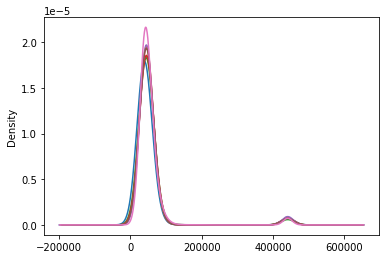

In [ ]:
for label in Content:
    ih = grouped_df.get_group(label)
    ih["length"].plot(kind='kde')

In [ ]:
Content

['activatemusic',
 'change languagenone',
 'deactivatelights',
 'decreaseheat',
 'decreasevolume',
 'increaseheat',
 'increasevolume']

In [ ]:
audio_lengthes_df["length"]

0       40961
1       30720
2       43009
3       38912
4       53248
        ...  
9849    60212
9850    58330
9851    58330
9852    50804
9853    62093
Name: length, Length: 9854, dtype: int64

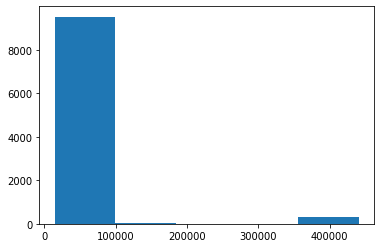

In [ ]:
import matplotlib.pyplot as plt

plt.hist(audio_lengthes_df["length"], bins=5)
plt.show()

In [ ]:
import numpy as np
# calculate quartiles
quartile_1, quartile_3 = np.percentile(audio_lengthes_df["length"], [25, 75])

# calculate interquartile range
iqr = quartile_3 - quartile_1

# identify outliers
outliers = []
for i in audio_lengthes_df["length"]:
    if i < (quartile_1 - 1.5 * iqr) or i > (quartile_3 + 1.5 * iqr):
        outliers.append(i)

print("Outliers: ", outliers)

Outliers:  [86016, 86016, 108544, 441000, 441000, 83968, 102401, 86016, 441000, 441000, 441000, 441000, 82791, 84672, 441000, 441000, 86554, 441000, 441000, 441000, 441000, 95962, 77147, 441000, 79028, 77147, 92198, 441000, 441000, 441000, 441000, 441000, 178177, 441000, 79872, 94209, 86016, 441000, 94209, 441000, 83968, 81920, 441000, 79028, 80909, 441000, 84672, 441000, 441000, 441000, 80909, 441000, 441000, 79028, 441000, 80909, 441000, 441000, 441000, 441000, 80909, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 77147, 88436, 441000, 441000, 441000, 83968, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 79028, 441000, 441000, 80909, 79028, 441000, 441000, 441000, 101607, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 441000, 95962, 441000, 83968, 79872, 79872, 441000, 441000, 143360, 441000, 81920, 81920, 98305, 441000, 441000, 441000, 83968, 159744, 441000, 441000, 441000, 441

In [ ]:
print(quartile_3 + 1.5 * iqr)


76670.5


In [ ]:
outlier_mask = audio_lengthes_df["length"]>76670
outlier_mask

0       False
1       False
2       False
3       False
4       False
        ...  
9849    False
9850    False
9851    False
9852    False
9853    False
Name: length, Length: 9854, dtype: bool

In [ ]:
outlier_mask_df =pd.DataFrame(outlier_mask)
type(outlier_mask_df)

pandas.core.frame.DataFrame

In [ ]:
outlier_mask_df.head

<bound method NDFrame.head of       length
0      False
1      False
2      False
3      False
4      False
...      ...
9849   False
9850   False
9851   False
9852   False
9853   False

[9854 rows x 1 columns]>

In [ ]:

import csv
filename = "outlier_mask.csv"
with open(filename, 'w', newline='') as csvfile:
    # Creating a CSV writer object
    csvwriter = csv.writer(csvfile)

    # Writing the column headers and data rows
    csvwriter.writerows(outlier_mask_df)

In [ ]:
dff = metadata
dff.drop(dff[outlier_mask].index, inplace=True)
dff.shape

(9295, 10)

In [ ]:
metadata[:40]

,Id,path,speakerId,action,object,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0a312...,2BqVo8kVB2Skwgyb,change language,none,advanced,English (United States),English (United States),female,22-40
1,1,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/0ee42...,2BqVo8kVB2Skwgyb,activate,music,advanced,English (United States),English (United States),female,22-40
2,2,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/1d9f3...,2BqVo8kVB2Skwgyb,deactivate,lights,advanced,English (United States),English (United States),female,22-40
3,3,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
4,4,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/5bbda...,2BqVo8kVB2Skwgyb,increase,volume,advanced,English (United States),English (United States),female,22-40
5,5,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/6436a...,2BqVo8kVB2Skwgyb,decrease,volume,advanced,English (United States),English (United States),female,22-40
6,6,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/6a1cd...,2BqVo8kVB2Skwgyb,increase,heat,advanced,English (United States),English (United States),female,22-40
7,7,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/72160...,2BqVo8kVB2Skwgyb,increase,heat,advanced,English (United States),English (United States),female,22-40
8,8,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/74d26...,2BqVo8kVB2Skwgyb,decrease,heat,advanced,English (United States),English (United States),female,22-40
9,9,dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/77cb5...,2BqVo8kVB2Skwgyb,decrease,heat,advanced,English (United States),English (United States),female,22-40


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    audio = audio[:76670]
    zero_padding = tf.zeros([76670] - tf.shape(audio), dtype=tf.float32)
    audio = tf.concat([audio, zero_padding ],0)
    audio = np.array(audio)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)

    return mfccs_features

In [ ]:
    file_name = os.path.join('/content/drive/My Drive/DSL_Final_Project',"dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc210-4474-11e9-a9a5-5dbec3b8816a.wav")
    print(file_name)


/content/drive/My Drive/DSL_Final_Project/dsl_data/audio/speakers/2BqVo8kVB2Skwgyb/269fc210-4474-11e9-a9a5-5dbec3b8816a.wav


In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]

#remove this
keeper = metadata[:50]

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join('/content/drive/My Drive/DSL_Final_Project',str(row["path"]))
    final_class_labels=row["action"] + row["object"]
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

9295it [06:39, 23.25it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()


,feature,class
0,"[[-729.049, -721.04285, -734.43567, -747.6961,...",change languagenone
1,"[[-775.2468, -773.01746, -749.923, -711.9694, ...",activatemusic
2,"[[-814.97595, -806.9605, -812.215, -800.7104, ...",deactivatelights
3,"[[-721.30536, -721.30536, -717.48987, -712.690...",increasevolume
4,"[[-772.1147, -776.286, -785.64465, -775.66644,...",increasevolume


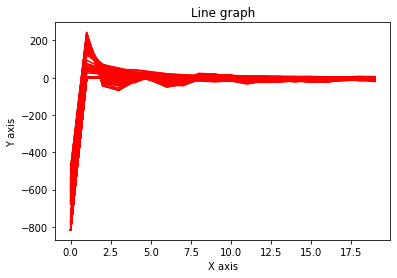

In [ ]:
x = extracted_features_df["feature"][5]
import matplotlib.pyplot as plt

# data to be plotted


# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, color ="red")
plt.show()

In [ ]:
extracted_features_df.iloc[100,0].shape

(20, 150)

In [ ]:
extracted_features_df.shape

(9295, 2)

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(9295, 40, 150)

In [ ]:
X.shape

(9295, 20, 150)

In [ ]:
X = X.reshape(9295,20,150,1)


In [ ]:
y.shape

(9295,)

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
y.shape

(9295, 7)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=10, shuffle = True )

In [ ]:
#X_train
X_train.shape

(7436, 20, 150, 1)

In [ ]:
X_test.shape

(1859, 20, 150, 1)

In [ ]:
y_train.shape

(7436, 7)

In [ ]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D,Flatten, MaxPooling2D
from keras.models import Sequential
from keras.layers import GlobalMaxPooling2D

In [ ]:
model = Sequential()
input_shape=(20, 150, 1)

model.add(Conv2D(24, (2, 2), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (2, 2), padding="valid"))
model.add(MaxPooling2D((2, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (2, 2), padding="valid"))
model.add(Activation('relu'))

model.add(GlobalMaxPooling2D())
#model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(7))
model.add(Activation("softmax"))

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 19, 149, 24)       120       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 9, 74, 24)        0         
 2D)                                                             
                                                                 
 activation_22 (Activation)  (None, 9, 74, 24)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 73, 48)         4656      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 36, 48)        0         
 2D)                                                             
                                                                 
 activation_23 (Activation)  (None, 2, 36, 48)        

In [ ]:
from keras.callbacks import TensorBoard, ModelCheckpoint
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/DSL_Final_Project/Logs/logC24_C48-C64_D64_7_5_globalmax_remove_strie_ad fc16')

# Define the checkpointer
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/DSL_Final_Project/bestModels/Conv2D_24_48_64_Dense_64_model_5_globalMax_remove_stride_ad fc16.h5',
                               verbose=1, save_best_only=True)

In [ ]:
model.compile(
	optimizer="Adam",
	loss="binary_crossentropy",
	metrics=['accuracy'])

history = model.fit(
	x=X_train,
	y=y_train,
    epochs=100,
    batch_size=8,
    validation_data= (X_test, y_test),
    callbacks=[tensorboard, checkpointer])

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Save the model
model.save('/content/drive/My Drive/DSL_Final_Project/savedModels/Conv2D_32_48_64_Dense_64_4model_gloablamax_remove_stride_ad fc16.h5')

Epoch 1/100
929/930 [============================>.] - ETA: 0s - loss: 0.5188 - accuracy: 0.1842
Epoch 1: val_loss improved from inf to 0.38392, saving model to /content/drive/My Drive/DSL_Final_Project/bestModels/Conv2D_24_48_64_Dense_64_model_5_globalMax_remove_stride_ad fc16.h5
930/930 [==============================] - 23s 24ms/step - loss: 0.5187 - accuracy: 0.1842 - val_loss: 0.3839 - val_accuracy: 0.3147
Epoch 2/100
927/930 [============================>.] - ETA: 0s - loss: 0.3924 - accuracy: 0.2727
Epoch 2: val_loss improved from 0.38392 to 0.36604, saving model to /content/drive/My Drive/DSL_Final_Project/bestModels/Conv2D_24_48_64_Dense_64_model_5_globalMax_remove_stride_ad fc16.h5
930/930 [==============================] - 19s 20ms/step - loss: 0.3925 - accuracy: 0.2722 - val_loss: 0.3660 - val_accuracy: 0.3421
Epoch 3/100
929/930 [============================>.] - ETA: 0s - loss: 0.3605 - accuracy: 0.3186
Epoch 3: val_loss improved from 0.36604 to 0.30916, saving model to /

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


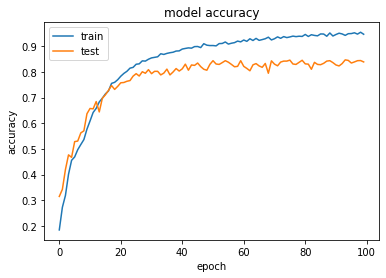

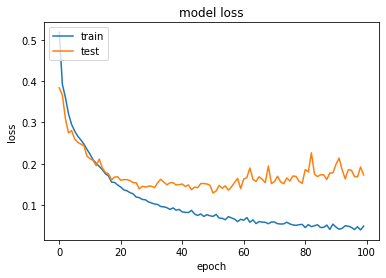

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# remove this later
def predict(name):
    b, fs = librosa.core.load(name)
    ps = librosa.feature.melspectrogram(b, sr=fs)
    S_DB = librosa.power_to_db(ps, ref=np.max)
    test = S_DB.reshape(1,128,217,1)
    return model.predict(test)

In [ ]:
file_path = '/content/drive/My Drive/DSL_Final_Project/evaluation.csv'
evaluation = pd.read_csv(file_path)
evaluation.head()

,Id,path,speakerId,Self-reported fluency level,First Language spoken,Current language used for work/school,gender,ageRange
0,0,dsl_data/audio/speakers/NgQEvO2x7Vh3xy2xz/f53c...,NgQEvO2x7Vh3xy2xz,native,English (United States),English (United States),male,22-40
1,1,dsl_data/audio/speakers/k5bqyxx2lzIbrlg9/1d5f8...,k5bqyxx2lzIbrlg9,native,English (United States),English (United States),male,22-40
2,2,dsl_data/audio/speakers/7B4XmNppyrCK977p/1c0d5...,7B4XmNppyrCK977p,native,English (United States),English (United States),male,41-65
3,3,dsl_data/audio/speakers/k5bqyxx2lzIbrlg9/275c3...,k5bqyxx2lzIbrlg9,native,English (United States),English (United States),male,22-40
4,4,dsl_data/audio/speakers/V4ZbwLm9G5irobWn/b7c7a...,V4ZbwLm9G5irobWn,native,English (United States),English (United States),female,41-65


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    audio = audio[:76670]
    zero_padding = tf.zeros([76670] - tf.shape(audio), dtype=tf.float32)
    audio = tf.concat([audio, zero_padding ],0)
    audio = np.array(audio)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)

    return mfccs_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]

for index_num,row in tqdm(evaluation.iterrows()):
    file_name = os.path.join('/content/drive/My Drive/DSL_Final_Project',str(row["path"]))
    data=features_extractor(file_name)
    extracted_features.append([data])


1455it [01:06, 21.78it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature'])
extracted_features_df.head()


,feature
0,"[[-617.2023, -617.2023, -617.2023, -617.2023, ..."
1,"[[-549.2558, -528.61554, -531.20276, -543.3042..."
2,"[[-701.62256, -701.41895, -701.2874, -701.6225..."
3,"[[-603.5141, -571.7804, -526.16187, -506.65253..."
4,"[[-567.13184, -505.84366, -481.97388, -484.483..."


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())


In [ ]:
X.shape

(1455, 20, 150)

In [ ]:
X = X.reshape(1455,20,150,1)

In [ ]:
predictions = model.predict(X)

46/46 [==============================] - 1s 19ms/step


In [ ]:
predictions = np.argmax(predictions, axis=-1)
predictions[:25]

array([4, 5, 5, 2, 4, 0, 6, 2, 3, 2, 5, 3, 2, 4, 6, 4, 1, 3, 4, 2, 1, 4,
       6, 4, 4])

In [ ]:

predicted_classes = labelencoder.inverse_transform(predictions)


In [ ]:
predicted_classes

array(['decreasevolume', 'increaseheat', 'increaseheat', ...,
       'increaseheat', 'decreaseheat', 'activatemusic'], dtype='<U19')

In [ ]:
 id = np.arange(0, len(predicted_classes)-1)

In [ ]:
finalEval= pd.DataFrame(predicted_classes)


In [ ]:
df = pd.DataFrame([x for x in range(len(predicted_classes))], columns=['Id'])
df.head()

,Id
0,0
1,1
2,2
3,3
4,4


In [ ]:
df['Predicted'] = predicted_classes
df.head()

,Id,Predicted
0,0,decreasevolume
1,1,increaseheat
2,2,increaseheat
3,3,deactivatelights
4,4,decreasevolume


In [ ]:
df.to_csv('final.csv', index=False)